<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/DL_Models/lightgbm_fs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Sameer-Tahir/Project_DS.git

Cloning into 'Project_DS'...
remote: Enumerating objects: 374, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 374 (delta 70), reused 9 (delta 9), pack-reused 268 (from 2)
Receiving objects: 100% (374/374), 26.75 MiB | 16.57 MiB/s, done.
Resolving deltas: 100% (142/142), done.


In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# --- Imports
import numpy as np, joblib, json
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)
from sklearn.preprocessing import label_binarize
import lightgbm as lgb

In [ ]:
# -----------------------
# Load your splits
# -----------------------
train_df = pd.read_csv("dfk1_train.csv")
val_df   = pd.read_csv("dfk1_val.csv")
test_df  = pd.read_csv("dfk1_test.csv")

✅ Data loaded: (4835, 6, 222) (4835,) (590, 6, 222)


In [ ]:
!unzip -o dl_preprocessed.zip

Archive:  dl_preprocessed.zip
  inflating: dl_data_windows.npz     
  inflating: label_encoder.pkl       
  inflating: scaler.pkl              


In [ ]:
import numpy as np, joblib

# -----------------------
# Load preprocessed arrays
# -----------------------
data = np.load("dl_data_windows.npz", allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_val, y_val     = data["X_val"],   data["y_val"]
X_test, y_test   = data["X_test"],  data["y_test"]
classes          = data["classes"]

print("✅ Data loaded:", X_train.shape, y_train.shape, X_test.shape)

✅ Data loaded: (4835, 6, 222) (4835,) (590, 6, 222)


In [ ]:
# -----------------------
# Flatten for FS (n, win, feat) → (n, win*feat)
# -----------------------
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat   = X_val.reshape(X_val.shape[0],   -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print("Flattened:", X_train_flat.shape, X_val_flat.shape, X_test_flat.shape)

Flattened: (4835, 1332) (591, 1332) (590, 1332)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1332
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1332
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1332
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1332
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1332
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1332
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1332
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	260
Tentative: 	323
Rejected: 	749
Iteration: 	9 / 100
Confirmed: 	260
Tentative: 	323
Rejected: 	749
Iteration: 	10 / 100
Confirmed: 	260
Tentative: 	323
Rejected: 	749
Iteration: 	11 / 100
Confirmed: 	260
Tentative: 	323
Rejected: 	749
Iteration: 	12 / 100
Confirmed: 	280
Tentative: 	303
Rejected: 	749
Iteration: 	13 / 100
Confirmed: 	280
Tentative: 	303
Rejected: 	749
Iteration: 	14 / 100
Confirmed: 	280
Tentative: 	303
Rejected: 	749
Iteration: 	15 / 100
Confirmed: 	280
Tentative: 	295
Rejected: 	757
Iteration:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



📊 LightGBM+FS Classification Report:

                        precision    recall  f1-score   support

       aggressive-scan       0.76      0.72      0.74        18
         cryptojacking       1.00      1.00      1.00       165
            icmp-flood       0.77      0.77      0.77        13
    icmp-fragmentation       1.00      0.92      0.96        13
icmp-fragmentation_old       0.40      0.33      0.36         6
                  none       1.00      1.00      1.00       220
     os-fingerprinting       0.56      0.77      0.65        13
               os-scan       0.62      0.83      0.71         6
             port-scan       0.73      0.58      0.65        19
        push-ack-flood       1.00      1.00      1.00        12
      serice-detection       0.83      0.83      0.83         6
     service-detection       0.45      0.36      0.40        14
             syn-flood       1.00      1.00      1.00        13
           syn-stealth       0.62      0.59      0.61        17


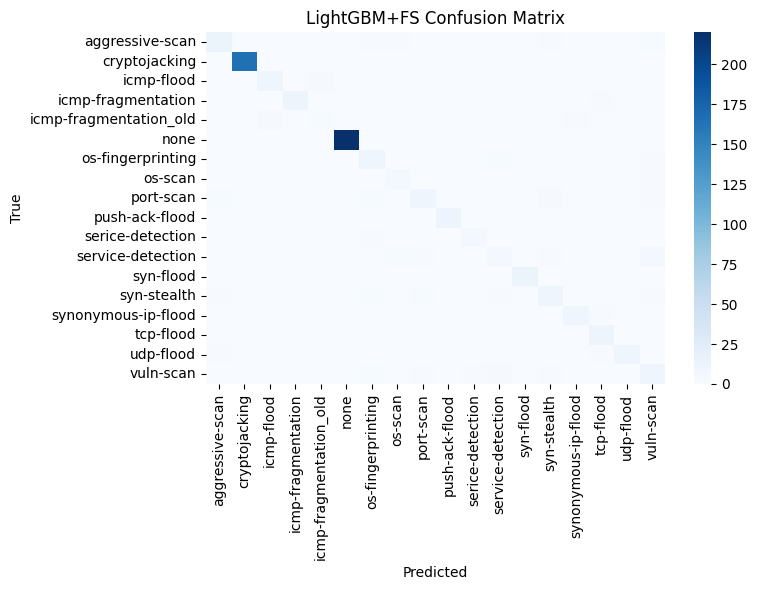

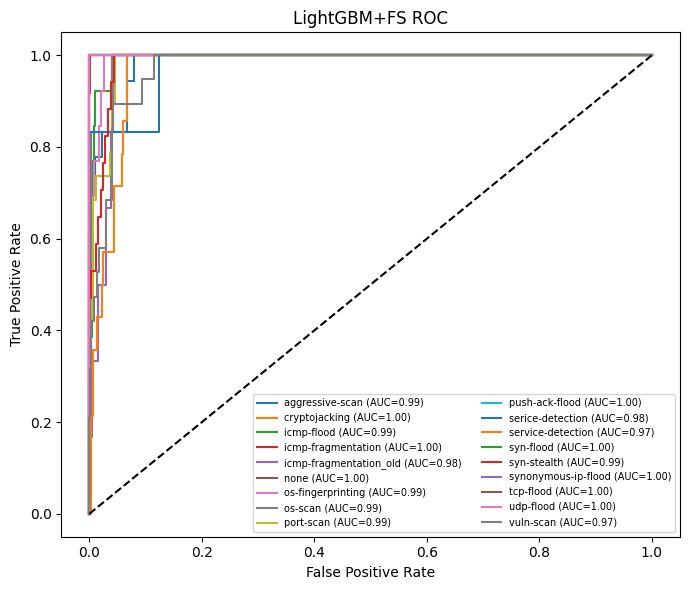

📦 Saved: LGBM_FS.pkl, results_ml.json, cm_lgb.png, roc_lgb.png, proba_ml.npy


In [ ]:
  # -----------------------
# Boruta Feature Selection
# -----------------------
rf = RandomForestClassifier(
    n_estimators=500, max_depth=6,
    class_weight="balanced", n_jobs=-1, random_state=42
)

boruta = BorutaPy(rf, n_estimators='auto', random_state=42, verbose=2, max_iter=100)
boruta.fit(X_train_flat, y_train)

sel_idx = np.where(boruta.support_)[0]
X_train_fs, X_val_fs, X_test_fs = (
    X_train_flat[:, sel_idx],
    X_val_flat[:, sel_idx],
    X_test_flat[:, sel_idx]
)

print(f"✅ Boruta kept {len(sel_idx)} features")

# -----------------------
# Train LightGBM
# -----------------------
lgb_model = lgb.LGBMClassifier(
    n_estimators=600, learning_rate=0.05,
    num_leaves=64, subsample=0.8, colsample_bytree=0.8,
    class_weight="balanced", random_state=42
)

lgb_model.fit(
    X_train_fs, y_train,
    eval_set=[(X_val_fs, y_val)],
    eval_metric="multi_logloss",
    callbacks=[lgb.early_stopping(20), lgb.log_evaluation(50)]
)

# -----------------------
# Evaluate
# -----------------------
y_pred_ml  = lgb_model.predict(X_test_fs)
y_proba_ml = lgb_model.predict_proba(X_test_fs)

acc_ml = accuracy_score(y_test, y_pred_ml)
f1_ml  = f1_score(y_test, y_pred_ml, average="macro")

print("\n📊 LightGBM+FS Classification Report:\n")
print(classification_report(y_test, y_pred_ml, target_names=classes, zero_division=0))
print(f"✅ Accuracy={acc_ml:.4f}, MacroF1={f1_ml:.4f}")

# -----------------------
# Confusion Matrix
# -----------------------
cm = confusion_matrix(y_test, y_pred_ml)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("LightGBM+FS Confusion Matrix")
plt.tight_layout(); plt.savefig("cm_lgb.png", dpi=200); plt.show()

# -----------------------
# ROC Curve (one-vs-rest)
# -----------------------
y_true_bin = label_binarize(y_test, classes=np.arange(len(classes)))
plt.figure(figsize=(7,6))
for i, name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_proba_ml[:, i])
    auc = roc_auc_score(y_true_bin[:, i], y_proba_ml[:, i])
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.title("LightGBM+FS ROC")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=7, ncol=2)
plt.tight_layout(); plt.savefig("roc_lgb.png", dpi=200); plt.show()

# -----------------------
# Save Results
# -----------------------
joblib.dump(lgb_model, "LGBM_FS.pkl")
np.save("proba_ml.npy", y_proba_ml)

with open("results_ml.json","w") as f:
    json.dump({
        "accuracy": float(acc_ml),
        "macro_f1": float(f1_ml),
        "report": classification_report(y_test, y_pred_ml, target_names=classes, zero_division=0),
        "confusion_matrix": cm.tolist()
    }, f, indent=2)

print("📦 Saved: LGBM_FS.pkl, results_ml.json, cm_lgb.png, roc_lgb.png, proba_ml.npy")